# Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


According to Wikipedia, EDA “is an approach to analyzing datasets to summarize their main characteristics, often with visual methods”. In my own words, it is about knowing your data, gaining a certain amount of familiarity with the data, before one starts to extract insights from it.
Since EDA is such a crucial initial step for all data science projects, the lazy me decided to write a code template for performing EDA on structured datasets. The idea is to spend less time coding and focus more on the analysis of data itself. Scroll down to the bottom for the link to the code, but do read on to find out more about EDA and understand what the code does.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

In [26]:
# read dataset
df = pd.read_csv('../datasets/winequality/winequality-red.csv',
                 sep=';')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [27]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [28]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [33]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
df.shape

(1599, 12)

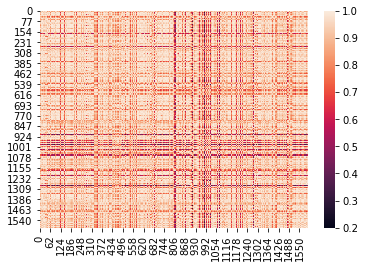

In [40]:
sns.heatmap(np.corrcoef(df))

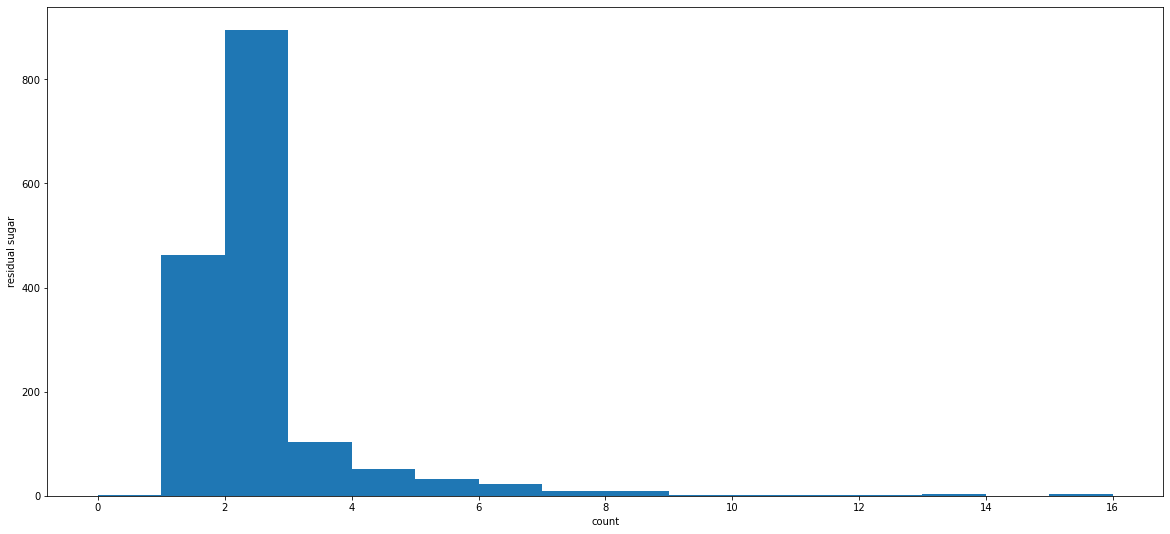

In [23]:
# create histogram
bin_edges = np.arange(0, df['residual sugar'].max() + 1, 1)
plt.figure(figsize=(20,9))
fig = plt.hist(df['residual sugar'], bins=bin_edges)

# add plot labels
plt.xlabel('count')
plt.ylabel('residual sugar')
plt.show()

## Scatterplot

A scatterplot is a type of data display that shows the relationship between two numerical variables. Each member of the dataset gets plotted as a point whose ( x , y ) (x, y) (x,y)left parenthesis, x, comma, y, right parenthesis coordinates relates to its values for the two variables.


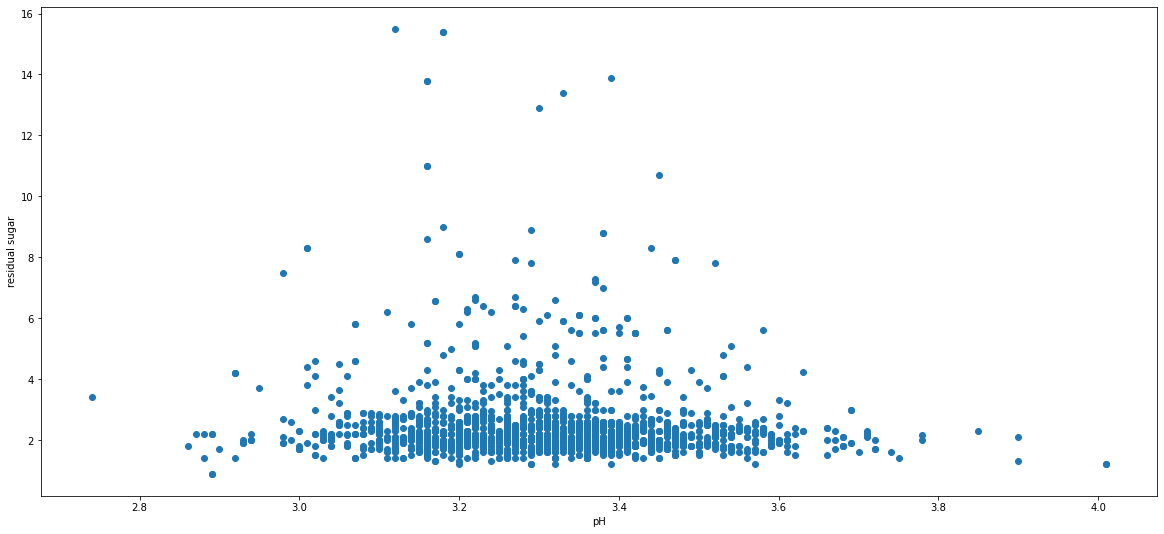

In [3]:
# create scatterplot
plt.figure(figsize=(20,9))
fig = plt.scatter(df['pH'], df['residual sugar'])

# add plot labels
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

## Scatterplot Matrix

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Figure size 1440x648 with 0 Axes>

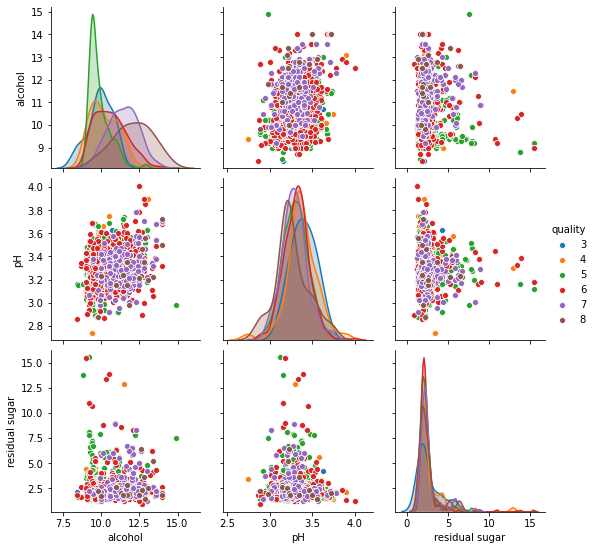

In [4]:
# create scatterplot matrix
plt.figure(figsize=(20,9))
fig = sns.pairplot(data=df[['alcohol', 'pH', 'residual sugar', 'quality']], 
                   hue='quality')

# add plot labels
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

## Bee Swarm Plot

A bee swarm plot is a one-dimensional scatter plot similar to “stripchart”, except that would-be overlapping points are separated such that each is visible. This function seems to offer the most options for customization such as several methods for placing the points and controlling the characters and colors

- useful for small datasets but can be slow on large datasets

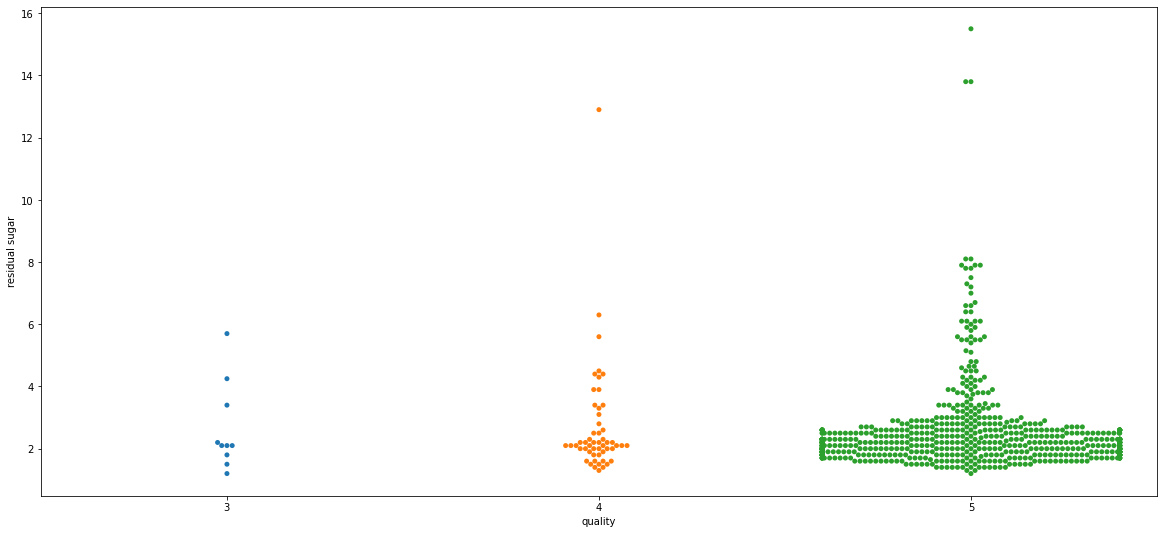

In [5]:
# create bee swarm plot
plt.figure(figsize=(20,9))
sns.swarmplot(x='quality', y='residual sugar', 
              data=df[df['quality'] < 6])
plt.show()

## Empirical Cumulative Distribution Function Plots

92.18 percent have 4 or less units residual sugar


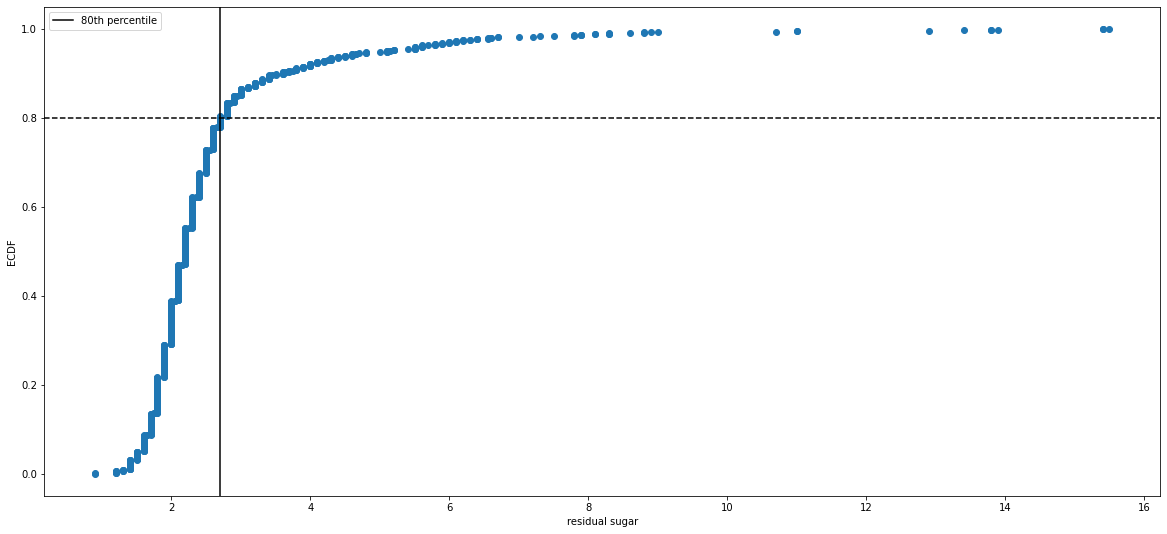

In [6]:
# sort and normalize data
x = np.sort(df['residual sugar'])
y = np.arange(1, x.shape[0] + 1) / x.shape[0]

# create ecd fplot
plt.figure(figsize=(20,9))
plt.plot(x, y, marker='o', linestyle='')


# add plot labels
plt.ylabel('ECDF')
plt.xlabel('residual sugar')

percent_four_or_less = y[x <= 4].max()
print('%.2f percent have 4 or less units residual sugar' % 
      (percent_four_or_less*100))

eightieth_percentile = x[y <= 0.8].max()

plt.axhline(0.8, color='black', linestyle='--')
plt.axvline(eightieth_percentile, color='black', label='80th percentile')
plt.legend()
plt.show()

## Boxplots

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (
1. Minimum, 
2. First quartile (Q1), 
3. Median, 
4. Third quartile (Q3), and “maximum”

It can tell you about your outliers and what their values are.

- Distribution of data in terms of median and percentiles (median is the 50th percentile)

In [8]:
percentiles = np.percentile(df['alcohol'], q=[25, 50, 75])
percentiles

array([ 9.5, 10.2, 11.1])

manual approach:

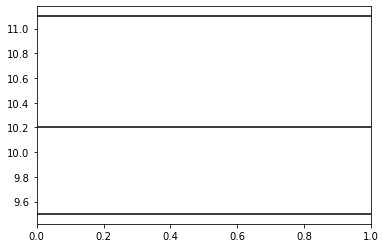

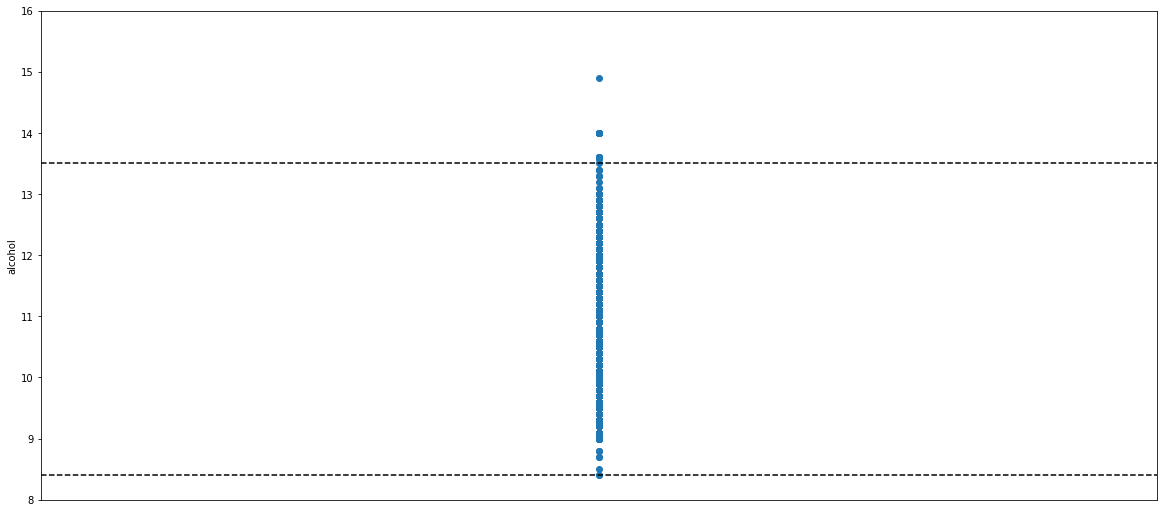

In [10]:
for p in percentiles:
    plt.axhline(p, color='black', linestyle='-')
    
plt.figure(figsize=(20,9))
plt.scatter(np.zeros(df.shape[0]) + 0.5, df['alcohol'])

iqr = percentiles[-1] - percentiles[0]
upper_whisker =  min(df['alcohol'].max(), percentiles[-1] + iqr * 1.5)
lower_whisker = max(df['alcohol'].min(), percentiles[0] - iqr * 1.5)
plt.axhline(upper_whisker, color='black', linestyle='--')
plt.axhline(lower_whisker, color='black', linestyle='--')

plt.ylim([8, 16])
plt.ylabel('alcohol')
fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

using matplotlib.pyplot.boxplot:

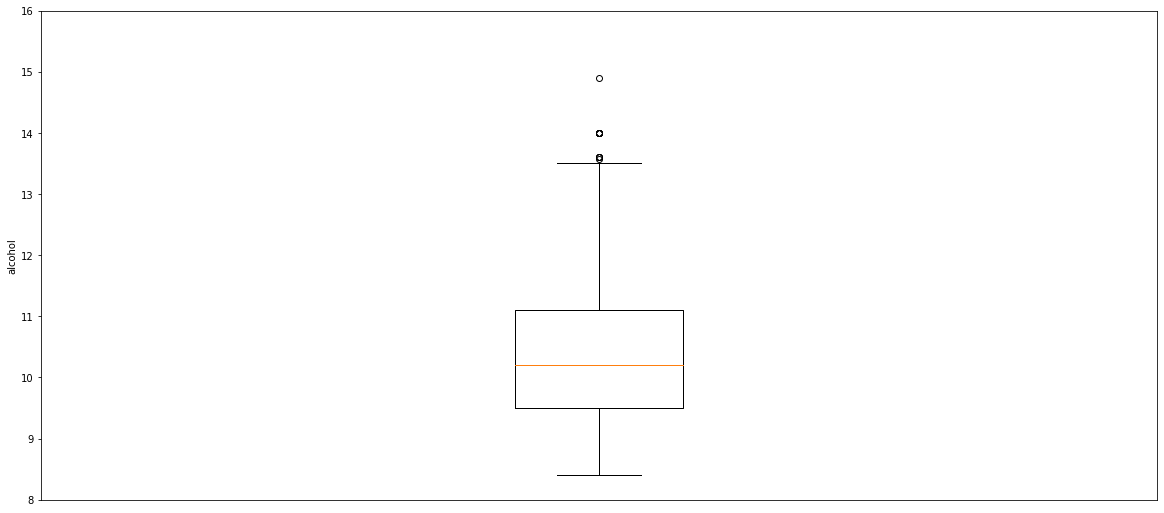

In [11]:
plt.figure(figsize=(20,9))
plt.boxplot(df['alcohol'])

plt.ylim([8, 16])
plt.ylabel('alcohol')

fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

## Violin Plots

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

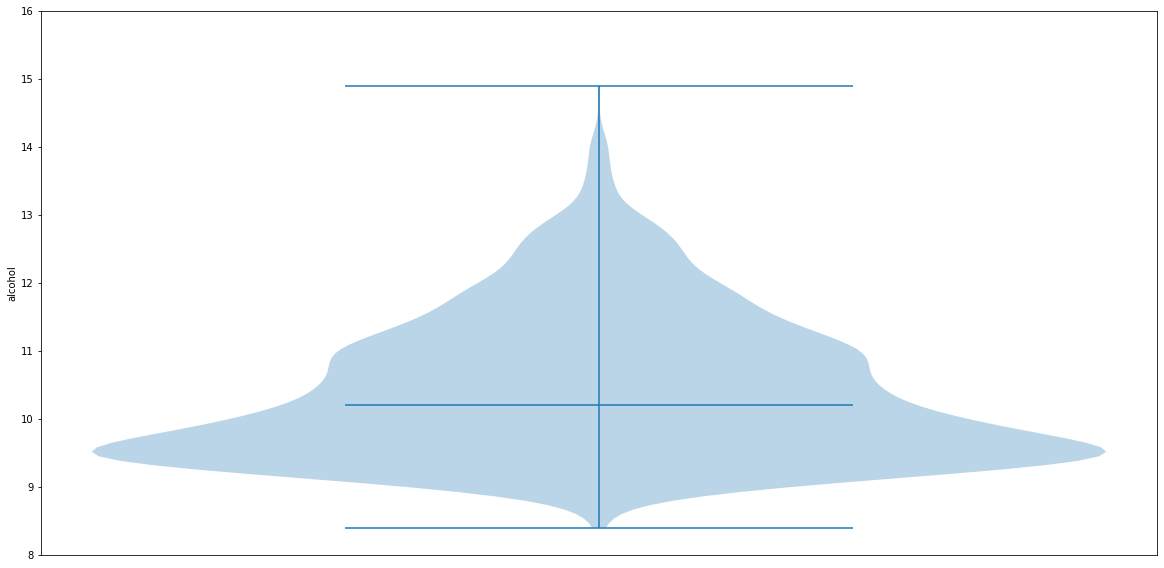

In [17]:
plt.figure(figsize=(20,10))
plt.violinplot(df['alcohol'], [0], 
               points=100, 
               bw_method='scott',
               showmeans=False, 
               showextrema=True, 
               showmedians=True)

plt.ylim([8, 16])
plt.ylabel('alcohol')
fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

## Pairplot 

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

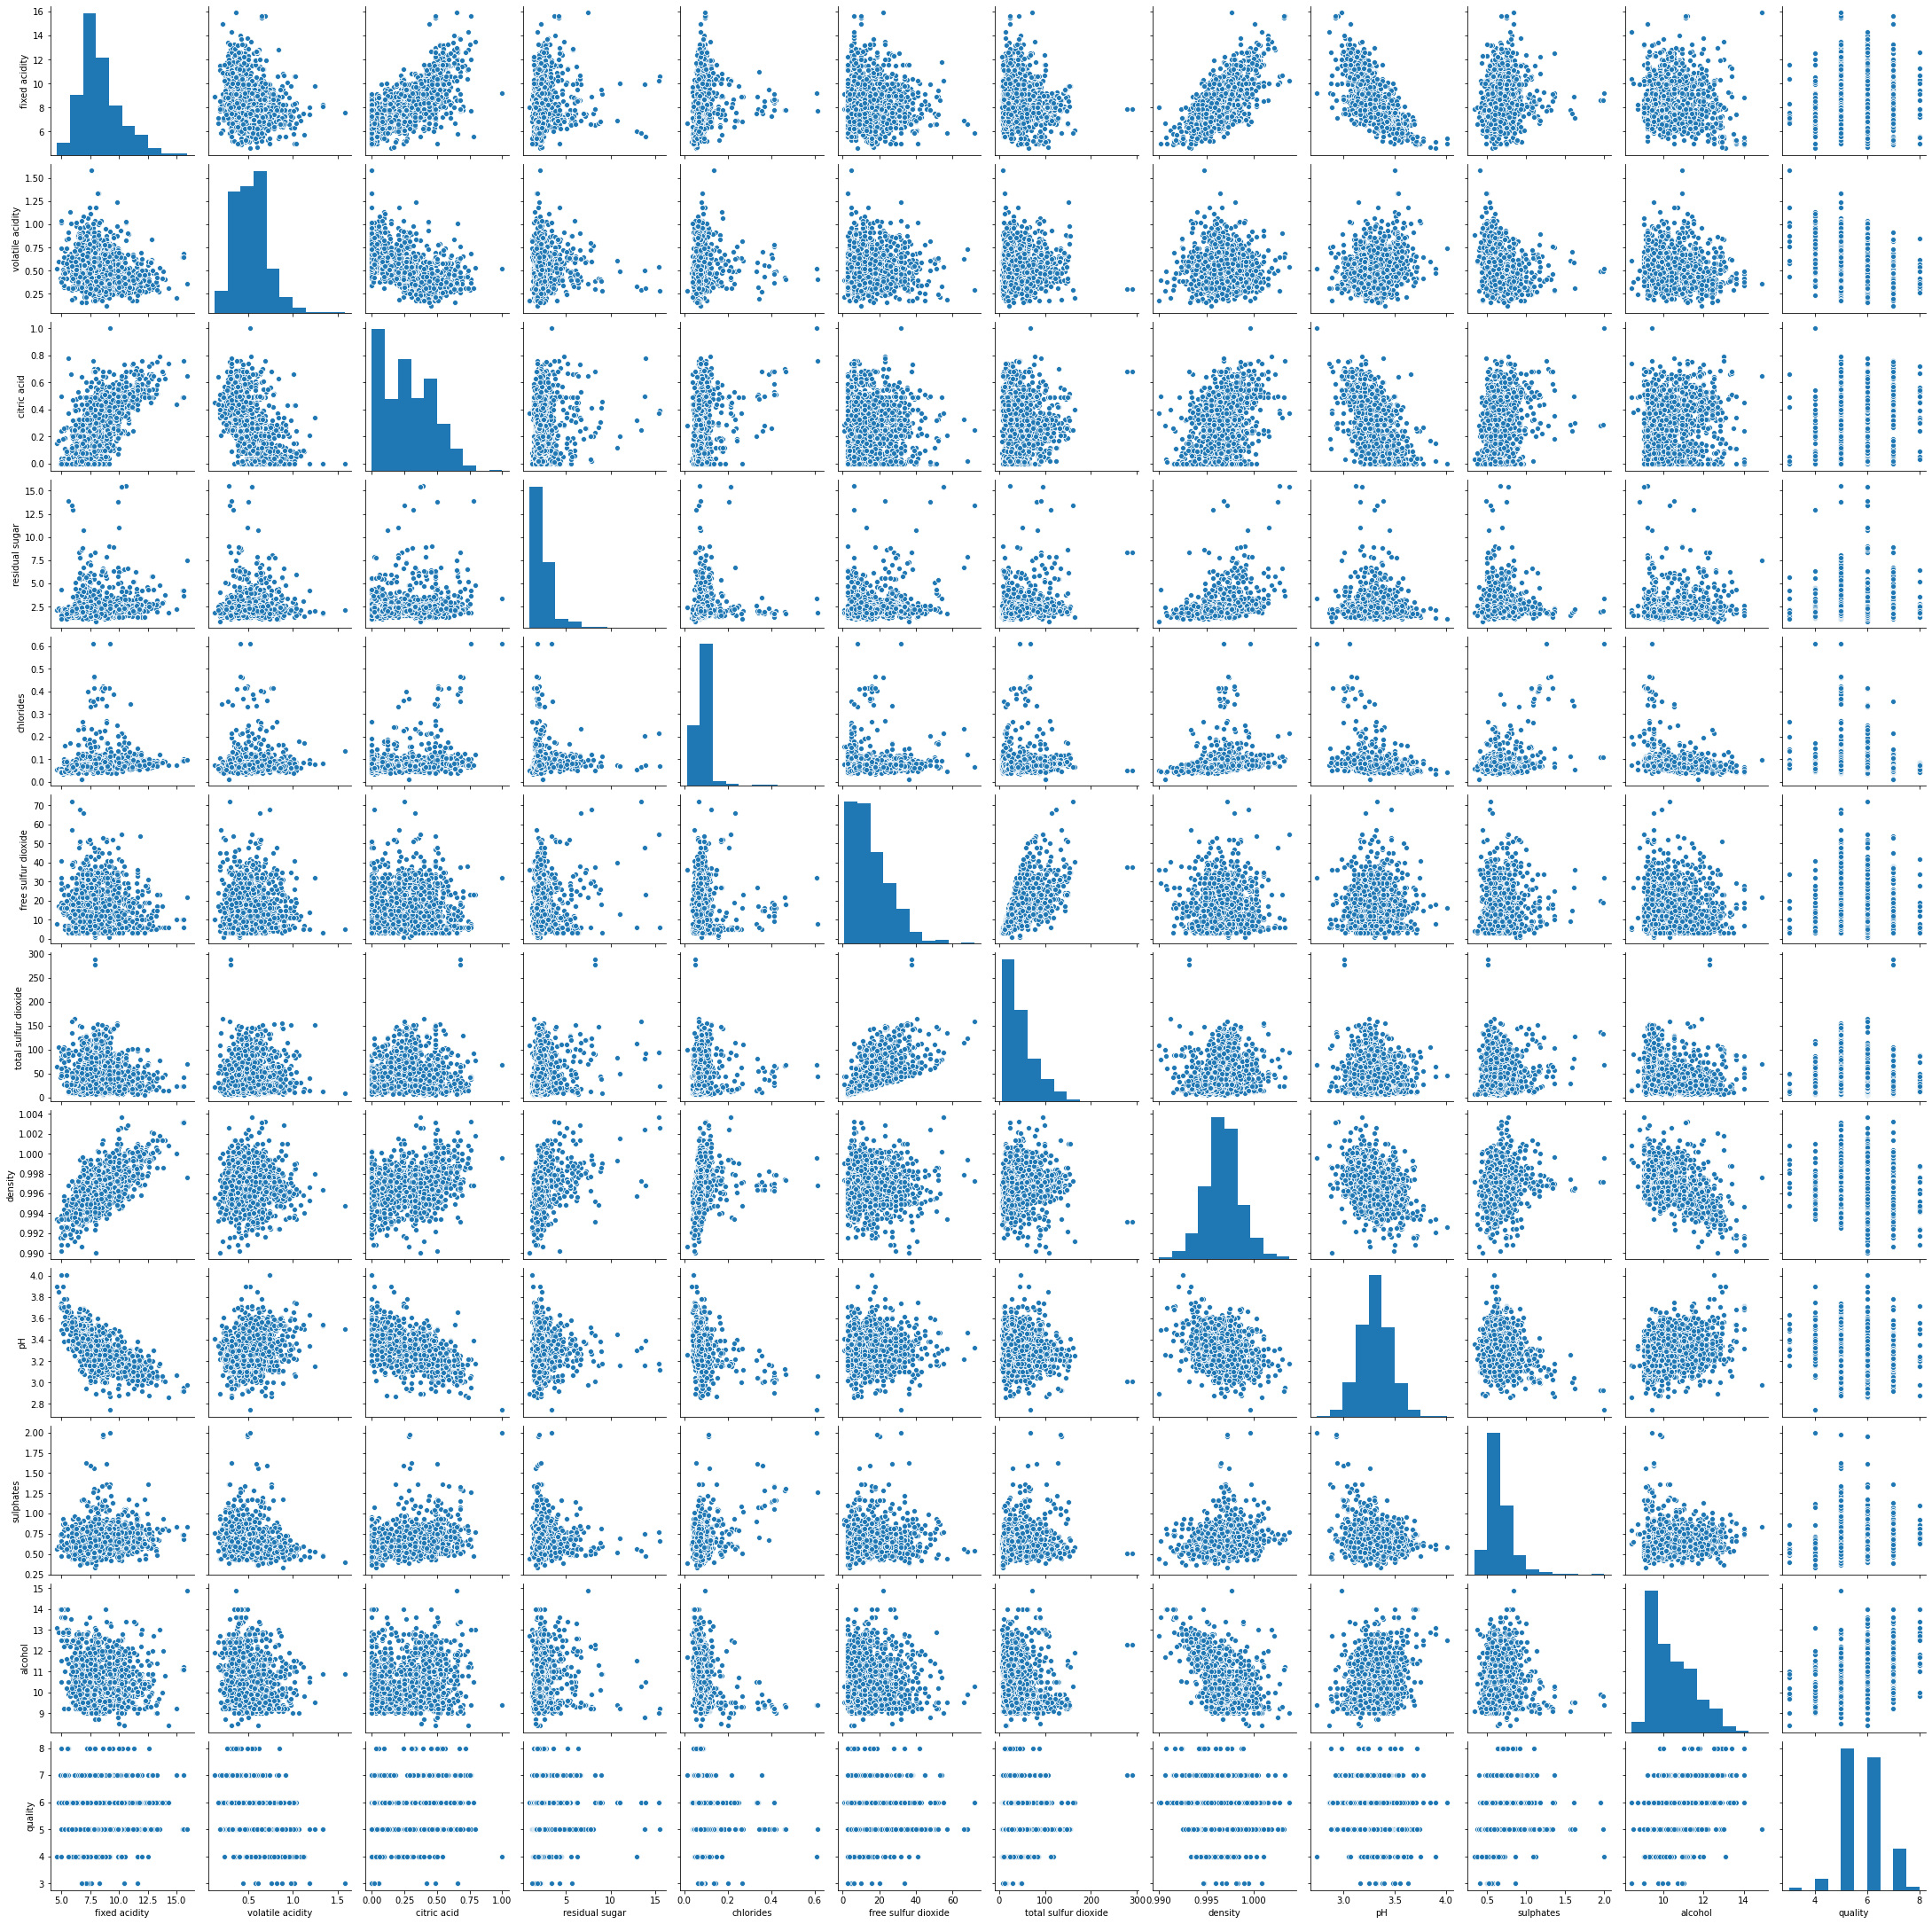

In [15]:
sns.pairplot(df)

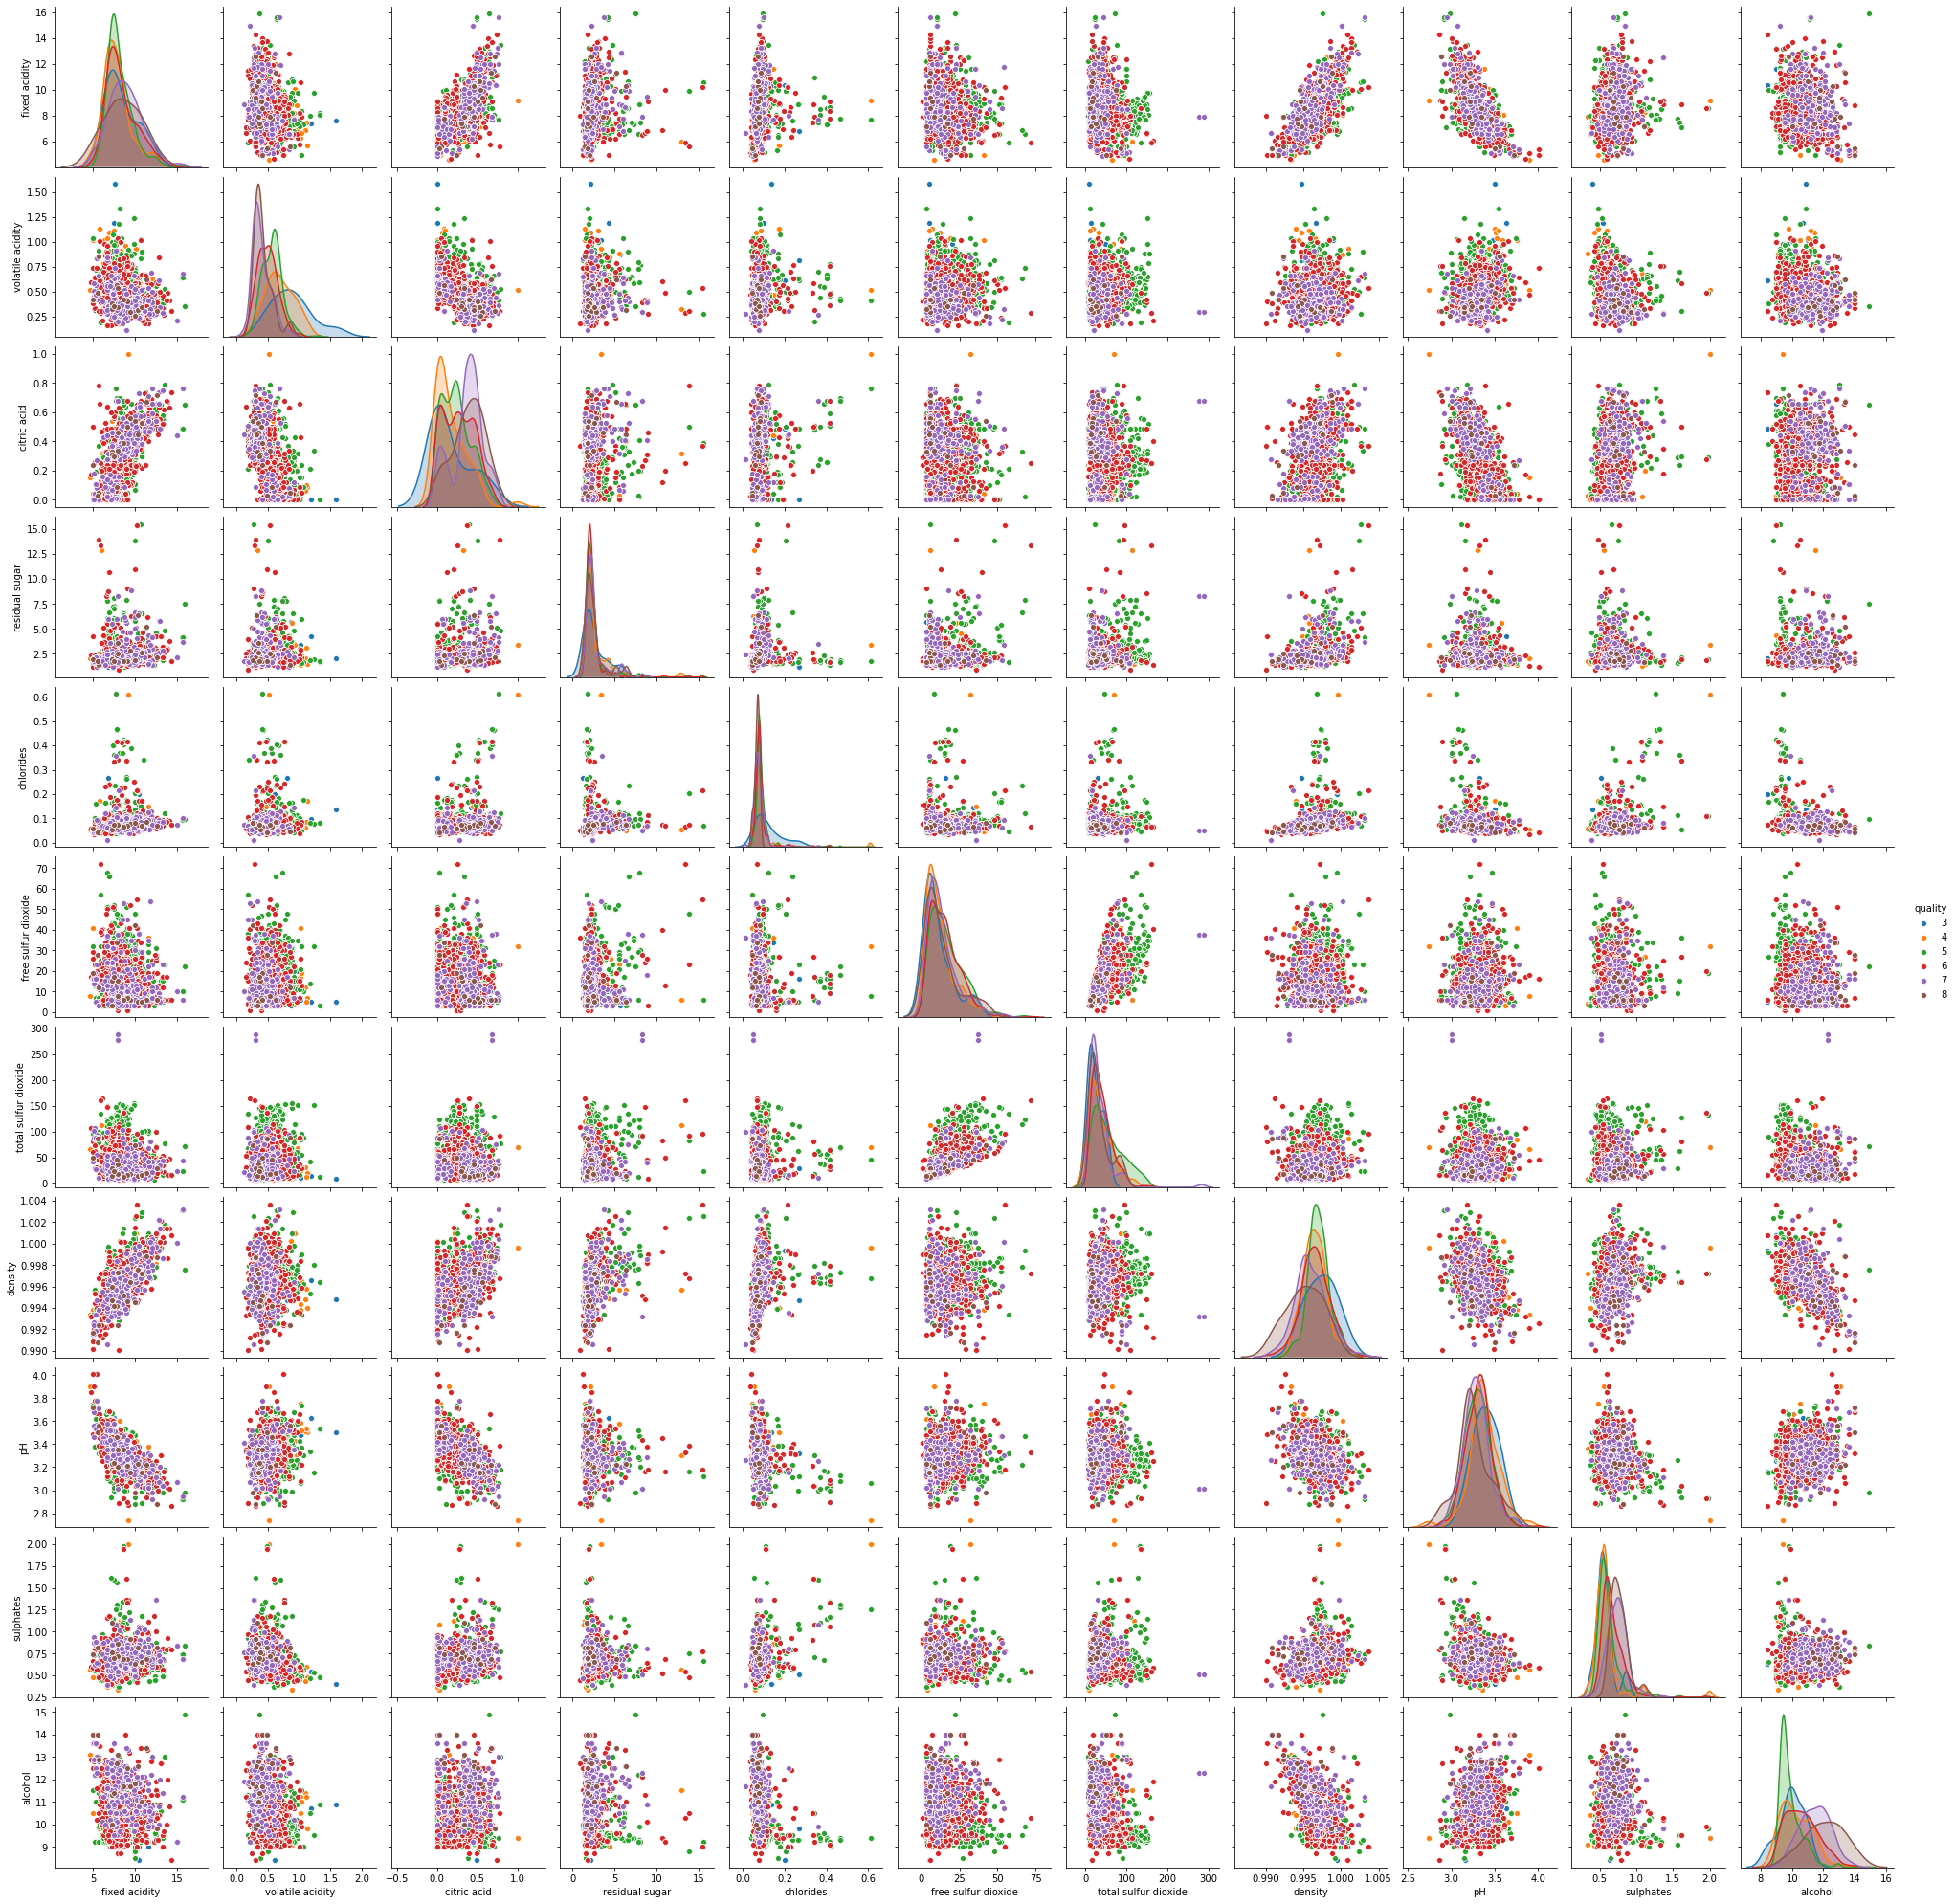

In [19]:
sns.pairplot(df, hue="quality")

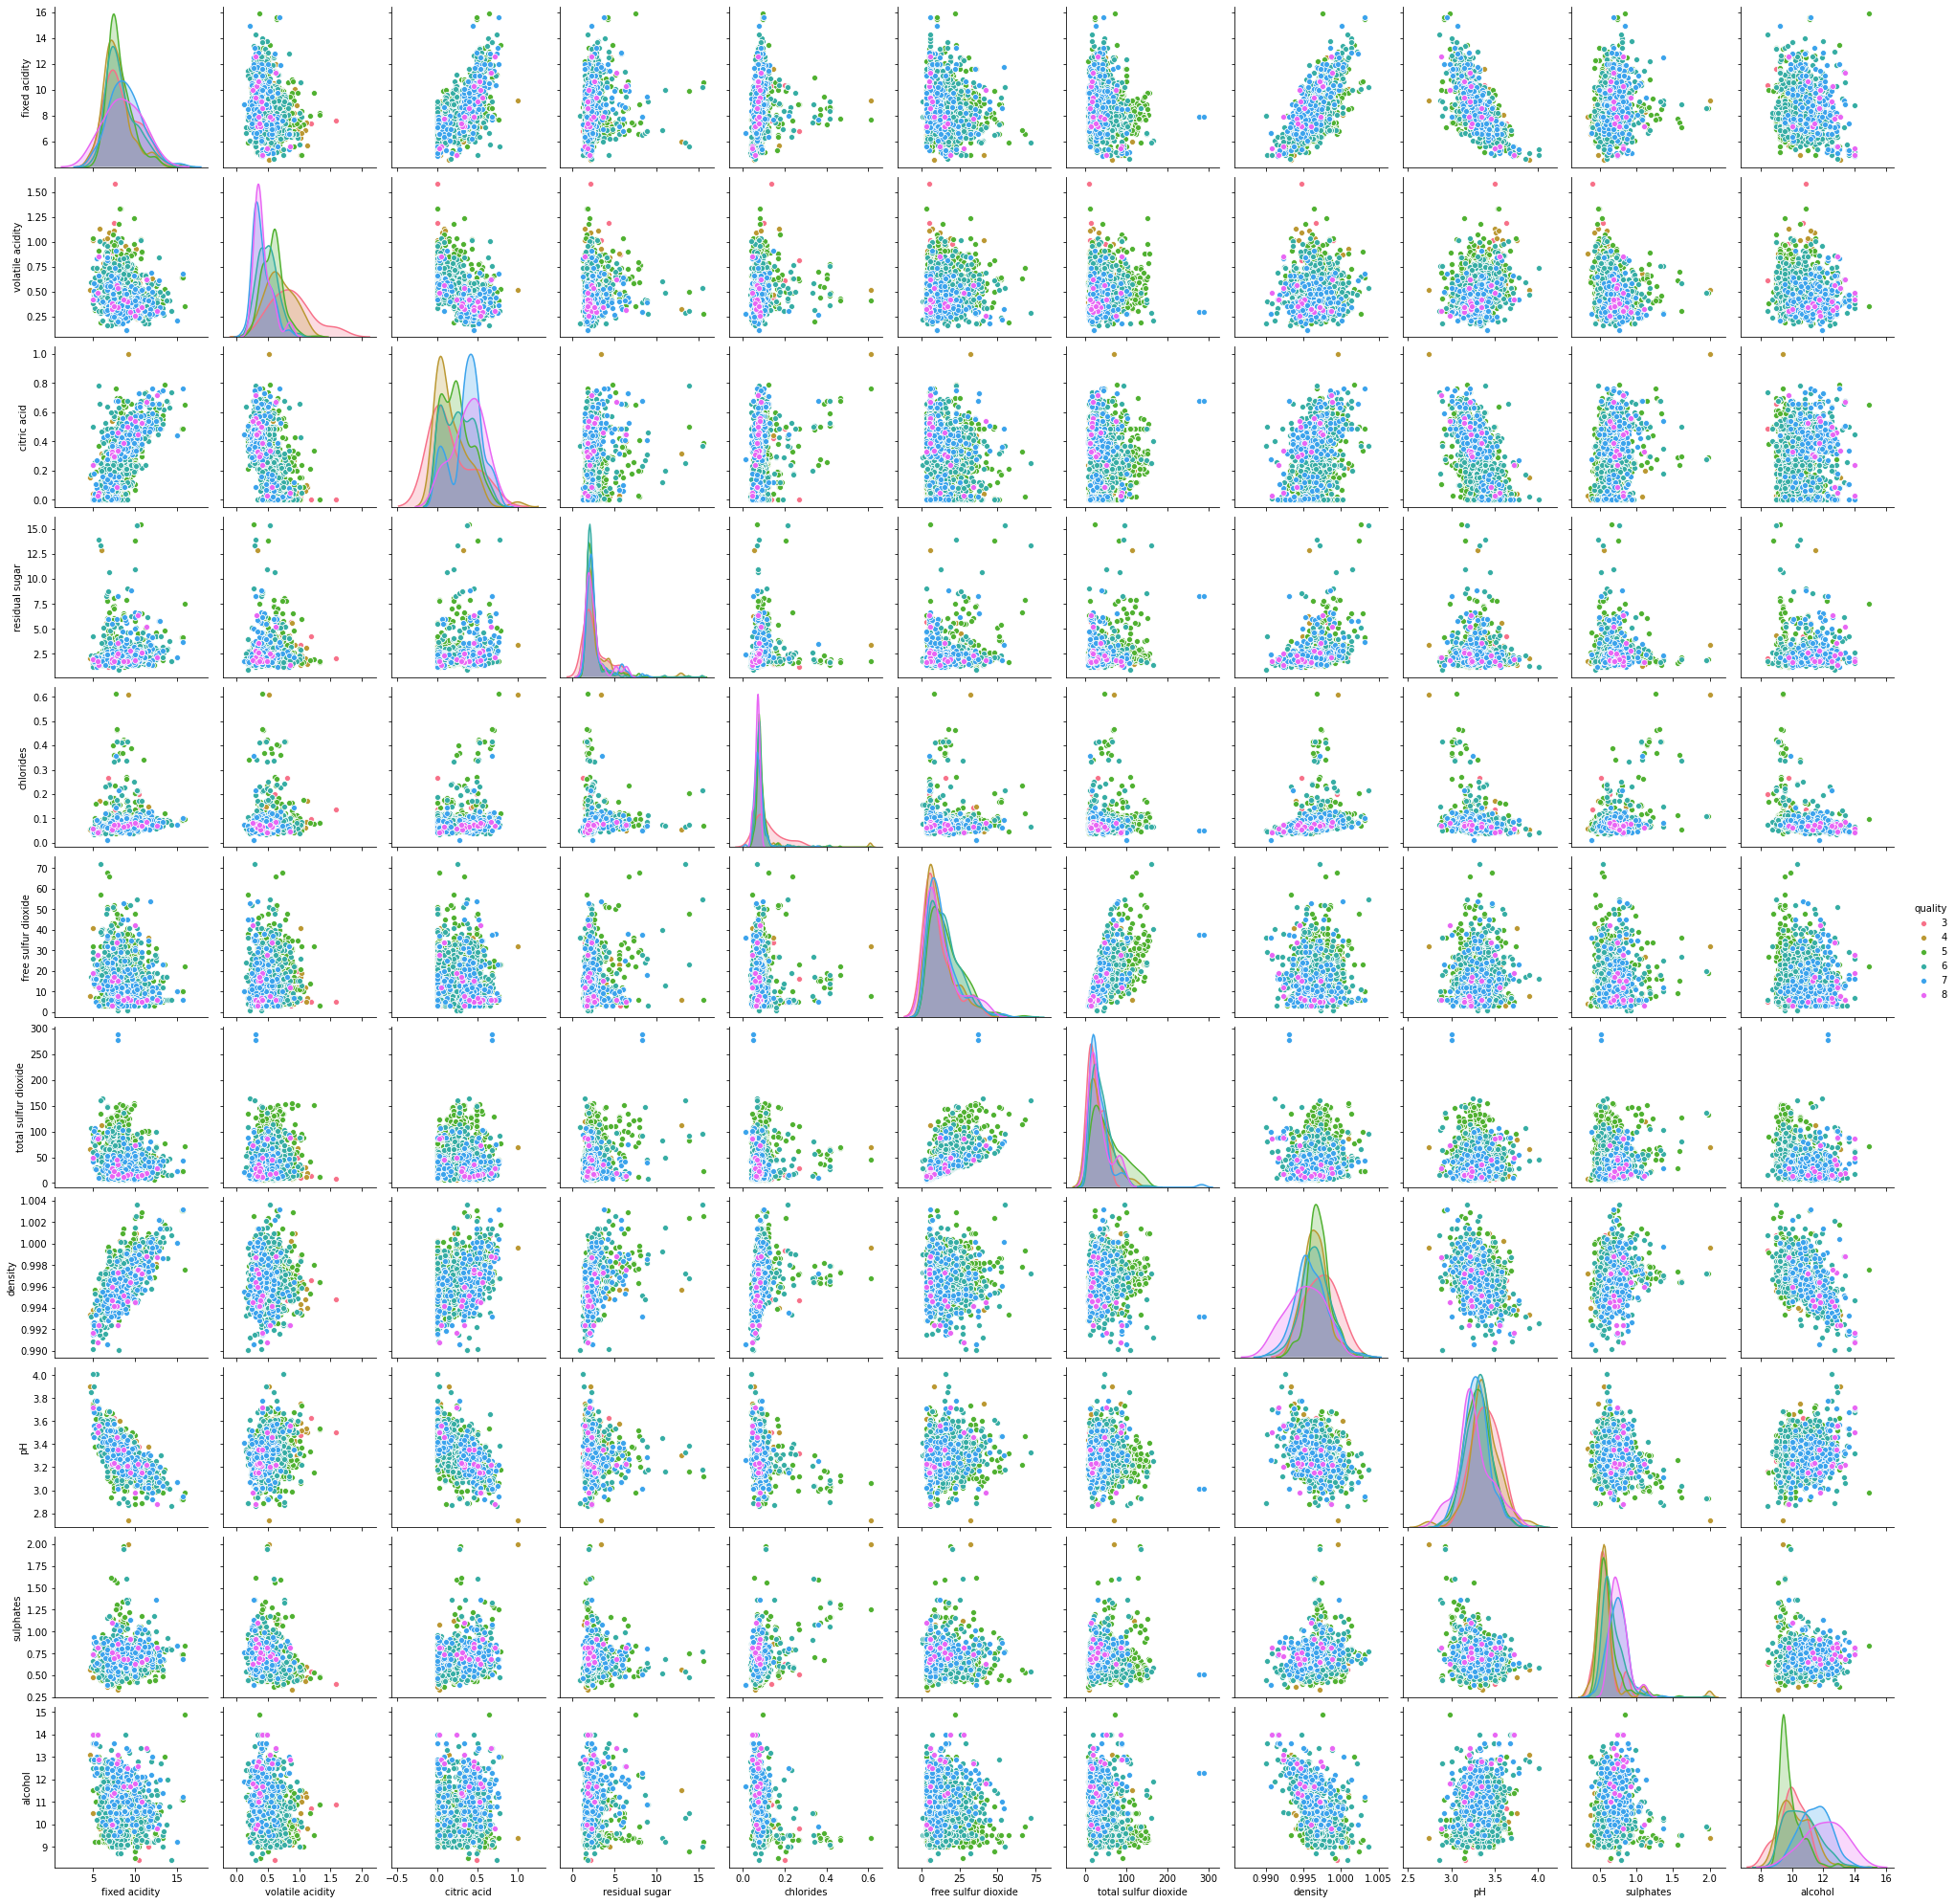

In [20]:
sns.pairplot(df, hue="quality",palette="husl")

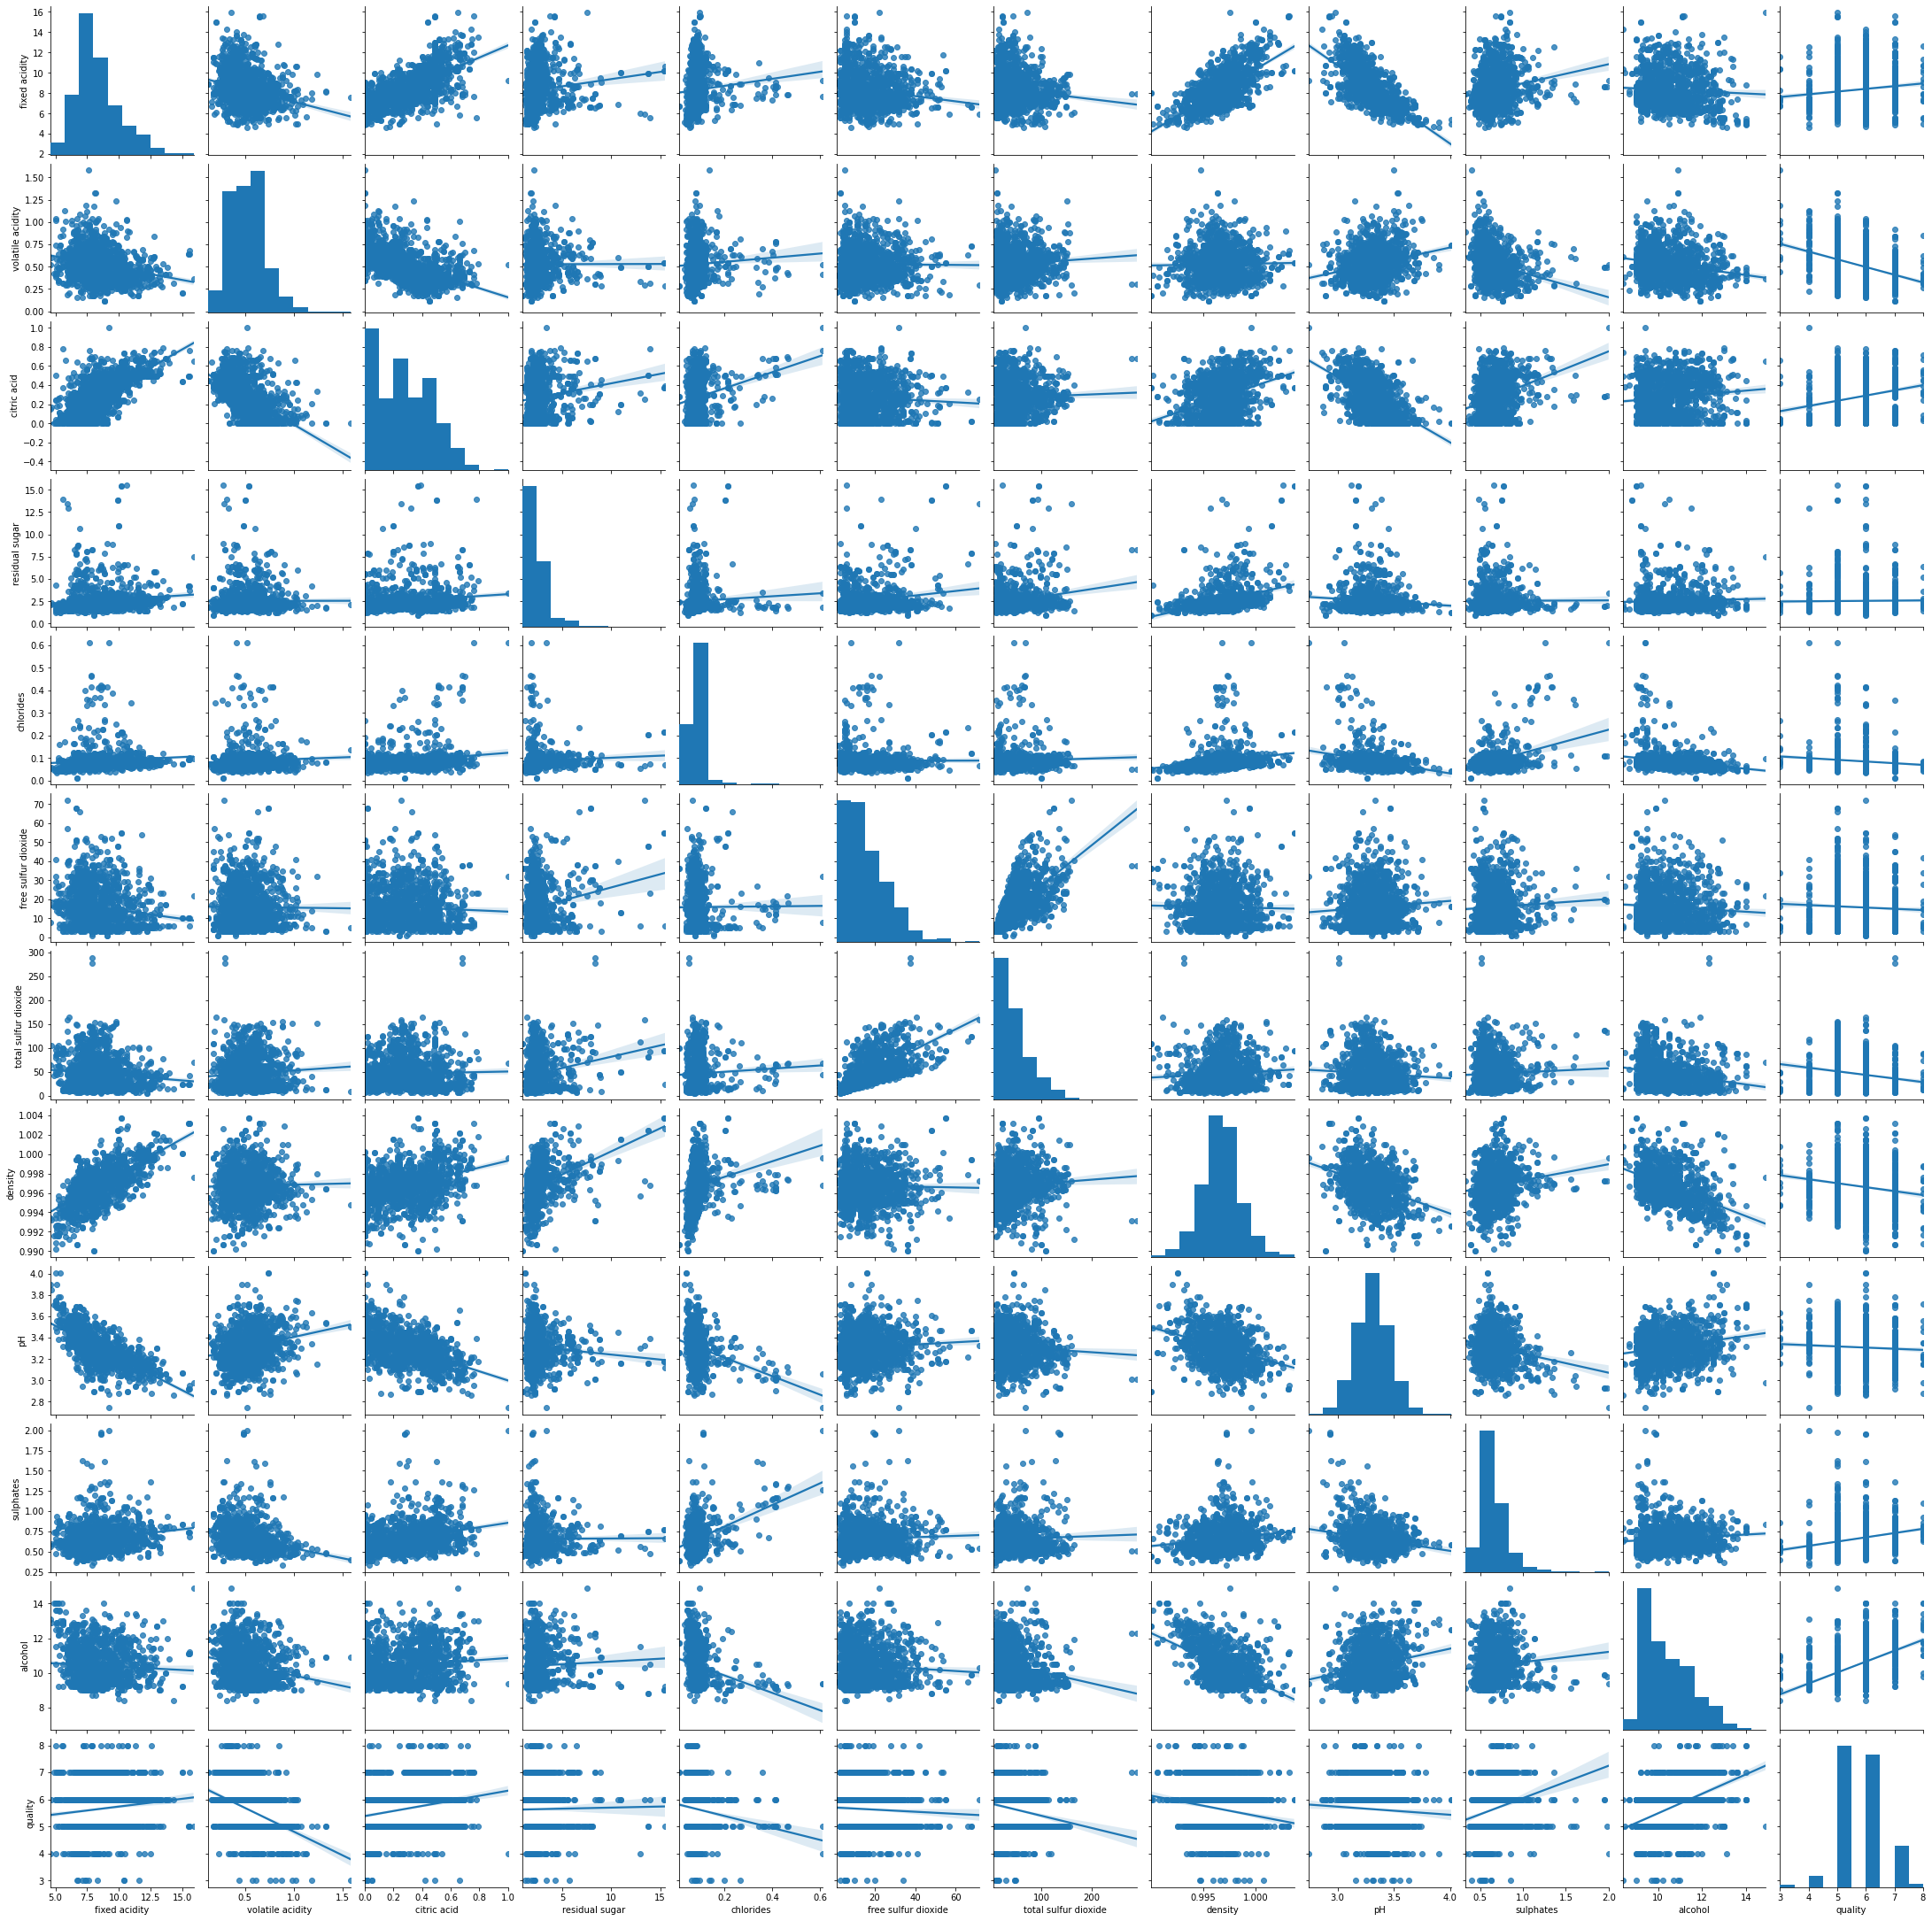

In [41]:
sns.pairplot(df, kind="reg")